# A simple Darcy-Flow spectrum analysis

#### In this example, I will demonstrate how to use the spectrum analysis function on the small Darcy-Flow example. For more details on spectrum analysis, users can take a look at this reference: https://www.astronomy.ohio-state.edu/ryden.1/ast825/ch7.pdf

## Short Summary

#### Spectral analysis is useful because it allows researchers to study the distribution of energy across different scales in a fluid flow. By examining the energy spectrum, one can gain insights into the behavior of turbulence or any other dataset and the underlying physical processes. The energy spectrum is analysed through the Fourier transform which is a mathematical tool that decomposes a function or signal into its constituent frequencies. In a fluid flow, it is used to analyze the distribution of energy across different scales in a flow. Specifically, the Fourier transform is applied to the velocity field of the flow, converting it into a frequency domain representation. Higher the wavenumber corresponds to higher frequency and higher energy and is a much harder task to solve as we need higher modes to capture the high-frequency behavior of the flow. Overall this allows researchers to study the energy spectrum, which provides insights into the behavior of turbulence and the underlying physical processes.

## Installs

In [14]:
#!pip install -U neuraloperator
#!pip install wandb
#!pip install torch-harmonics
#!pip install neuralop

ERROR: Could not find a version that satisfies the requirement neuralop (from versions: none)
ERROR: No matching distribution found for neuralop


## Imports
#### First Import the 'neuralop' library and required dependencies

In [18]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from neuralop.utils import spectrum_2d
from neuralop.datasets import load_darcy_flow_small

font = {'size' :28}
matplotlib.rc('font', **font)

torch.manual_seed(0)
np.random.seed(0)

## Define Variables

In [19]:
T = 5000 # <-- Number of time steps
samples = 50
s = 16 # <-- resoltution of the dataset

# Additional parameters for the dataset
Re = 5000
index = 1
T = 100
dataset_name = 'Darcy Flow'

## Loading the Navier-Stokes dataset in 128x128 resolution

In [20]:
train_loader, test_loader, data_processor = load_darcy_flow_small(
    n_train=50, batch_size=50,
    test_resolutions=[16, 32], n_tests=[50],
    test_batch_sizes=[32], positional_encoding=False,
    encode_output=False
)

# This is highly depending on your dataset and its structure ['x', 'y'] (In Darcy Flow)
print('Original dataset shape', train_loader.dataset[:samples]['x'].shape) # Check the shape

# It is important to note that we want the last two dimensions to represent the spatial dimensions
# So in some cases one might have to permute the dataset after squeezing the initial dimensions as well
dataset_pred = train_loader.dataset[:samples]['x'].squeeze() # squeeze the dataset to remove the batch dimension or other dimensions

# Shape of the dataset
shape = dataset_pred.shape

# Define the grid size - in our case its a 2d Grid repeating, for higher dimensions this will change
# Example for 3d grid
"""
batchsize, size_x, size_y, size_z = 1, shape[0], shape[1], shape[2]
gridx = torch.tensor(np.linspace(-1, 1, size_x), dtype=torch.float)
gridx = gridx.reshape(1, size_x, 1, 1, 1).repeat([batchsize, 1, size_y, size_z, 1])
gridy = torch.tensor(np.linspace(-1, 1, size_y), dtype=torch.float)
gridy = gridy.reshape(1, 1, size_y, 1, 1).repeat([batchsize, size_x, 1, size_z, 1])
gridz = torch.tensor(np.linspace(-1, 1, size_z), dtype=torch.float)
gridz = gridz.reshape(1, 1, 1, size_z, 1).repeat([batchsize, size_x, size_y, 1, 1])
grid = torch.cat((gridx, gridy, gridz), dim=-1)
"""
batchsize, size_x, size_y = 1, shape[1], shape[2]
gridx = torch.tensor(np.linspace(-1, 1, size_x), dtype=torch.float)
gridx = gridx.reshape(1, size_x, 1).repeat([batchsize, 1, size_y])
gridy = torch.tensor(np.linspace(-1, 1, size_y), dtype=torch.float)
gridy = gridy.reshape(1, 1, size_y).repeat([batchsize, size_x, 1])
grid = torch.cat((gridx, gridy), dim=-1)

Original dataset shape torch.Size([50, 1, 16, 16])


## FFT PLOT

C:\Users\josjohn\AppData\Local\Temp\ipykernel_21312\1178432106.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(10, 10^10)


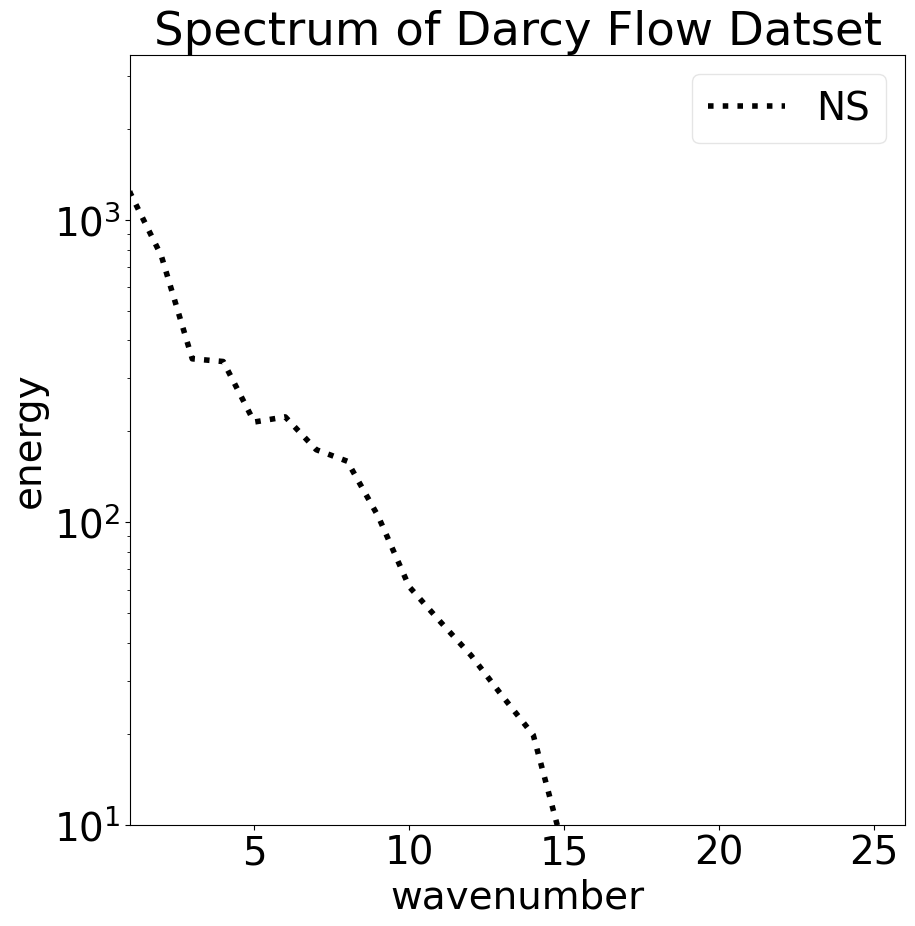

In [21]:
# Generate the spectrum of the dataset
# Again only the last two dimensions have to be resolution and the first dimension is the reshaped product of all the other dimensions
truth_sp = spectrum_2d(dataset_pred.reshape(samples * batchsize, s, s), s)

# Generate the spectrum plot and set all the settings
fig, ax = plt.subplots(figsize=(10,10))

linewidth = 3
ax.set_yscale('log')

length = 16 # typically till the resolution length of the dataset
buffer = 10 # just add a buffer to the plot
k = np.arange(length + buffer) * 1.0
ax.plot(truth_sp, 'k', linestyle=":", label="NS", linewidth=4)

ax.set_xlim(1,length+buffer)
ax.set_ylim(10, 10^10)
plt.legend(prop={'size': 20})
plt.title('Spectrum of {} Datset'.format(dataset_name))

plt.xlabel('wavenumber')
plt.ylabel('energy')

# show the figure
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()